# Timing Redis Operations

*Data Structures and Information Retrieval in Python*

Copyright 2021 Allen Downey

License: [Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International](https://creativecommons.org/licenses/by-nc-sa/4.0/)

[Click here to run this notebook on Colab](https://colab.research.google.com/github/AllenDowney/DSIRP/blob/main/chapters/time_redis.ipynb)

## Performance of lpush and rpush

The [Redis documentation](https://redis.io/topics/data-types) says

> The main features of Redis Lists from the point of view of time complexity are the support for constant time insertion and deletion of elements near the head and tail, even with many millions of inserted items. Accessing elements is very fast near the extremes of the list but is slow if you try accessing the middle of a very big list, as it is an O(N) operation.

In class recently, we saw some behavior that suggested that `lpush` might be linear (as we would expect from an array list, like Python lists) rather than constant time (as we would expect from a linked list).

So let's find out.

In [1]:
import sys

IN_COLAB = 'google.colab' in sys.modules

if IN_COLAB:
    !pip install redis-server
    !/usr/local/lib/python*/dist-packages/redis_server/bin/redis-server --daemonize yes
else:
    !redis-server --daemonize yes

91563:C 04 Nov 2021 14:09:47.144 # oO0OoO0OoO0Oo Redis is starting oO0OoO0OoO0Oo
91563:C 04 Nov 2021 14:09:47.144 # Redis version=5.0.3, bits=64, commit=00000000, modified=0, pid=91563, just started
91563:C 04 Nov 2021 14:09:47.144 # Configuration loaded


In [2]:
try:
    import redis
except ImportError:
    !pip install redis

In [3]:
import redis

r = redis.Redis()

In [4]:
from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)
    
download('https://github.com/AllenDowney/DSIRP/raw/main/timing.py')

## lpush


In [5]:
def lpush(n):
    key = 'lpush_test'
    [r.lpush(key, x) for x in range(n)]
    r.delete(key)

In [6]:
def rpush(n):
    key = 'rpush_test'
    [r.rpush(key, x) for x in range(n)]
    r.delete(key)

In [7]:
from timing import run_timing_test

ns, ts = run_timing_test(rpush)

1024 0.040000000000000036
2048 0.06999999999999984
4096 0.16000000000000014
8192 0.31000000000000005
16384 0.6299999999999999
32768 1.1999999999999997


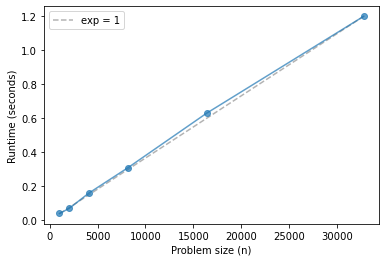

In [8]:
from timing import plot_timing_test

plot_timing_test(ns, ts, scale='linear')